In [7]:
import numpy as np
import tqdm.notebook as tqdm
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
def model(x, beta, b):
    """This is our regression model.
    
    x: (n_samples, n_features)
    beta: (n_features, )
    # c: (n_features, )
    
    return: (n_samples, )
    
    """
    return x @ beta.T + b
    
    
def mse(*, y_true, y_pred):
    """Compute the log loss.

    y_true: (n_samples, )
    y_pred: (n_samples, )
    """
    residual = y_true - y_pred
    
    return np.dot(residual, residual) / (len(residual))


def loss_fn(*, y_true, y_pred, lambda_, beta):
    """Get the lasso loss function."""
    loss = mse(y_true=y_true, y_pred=y_pred) + lambda_ * beta.mean()

In [9]:
def beta_loss_gradient(y_true, x, beta, b, lambda_):
    """Compute the value of the dloss/dbeta"""
    m = len(y_true)
    h = model(x, beta, b)
    y = y_true
    
    return (2 / m) * (x.T @ (h - y)) + lambda_


def b_loss_gradient(y_true, x, beta, b):
    """Compute the value of the dloss/dbeta"""
    m = len(y_true)
    h = model(x, beta, b)
    y = y_true
    
    return (2 / m) * (h - y).sum()

In [25]:
def gradient_descent_step(y_true, x, beta, b, lambda_, learning_rate=0.01):
    new_beta = beta - learning_rate * beta_loss_gradient(y_true, x, beta, b, lambda_)
    new_b = b - learning_rate * b_loss_gradient(y_true, x, beta, b)
    y_pred = model(x, new_beta, new_b)
    loss = loss_fn(y_true=y_true, y_pred=y_pred, lambda_=lambda_, beta=new_beta)
    
    return new_beta, new_b, loss


def run_gradient_descent(
    y_true, x, beta_init, b_init=0, learning_rate=0.1, lambda_=0.1, n_steps=1000000
):
    """Run the gradient descent loop."""
    loss_dict = {-1: loss_fn(y_true=y_true, y_pred=model(x, beta_init, b_init), lambda_=lambda_, beta=beta_init)}
    
    beta = beta_init
    b = b_init
    for i in tqdm.tqdm(range(n_steps)):
        beta, b, loss = gradient_descent_step(y_true, x, beta, b, lambda_, learning_rate=learning_rate)
        loss_dict[i] = loss
        
    return beta, b, loss_dict

In [26]:
x, y = make_regression(n_samples=500, random_state=42, n_features=1, n_informative=1)
x = StandardScaler().fit_transform(x)

beta = np.zeros(x.shape[-1])

beta, b, loss_dict = run_gradient_descent(y, x, beta, n_steps=100)
y_pred = model(x, beta, b)

  0%|          | 0/100 [00:00<?, ?it/s]

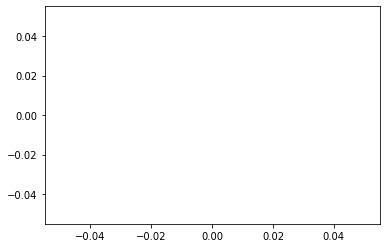

In [27]:
plt.plot(loss_dict.keys(), loss_dict.values())
plt.show()
plt.close()

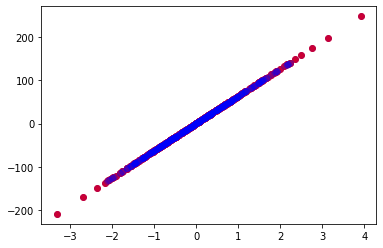

In [28]:
plt.scatter(x[:, 0], y, c='red')
plt.scatter(x[:, 0], y_pred, c='blue', alpha=0.2)
plt.show()
plt.close()

In [8]:
def RSS(*, y_true, y_pred):
    residual = y_pred - y_true
    return np.dot(residual, residual)


def TSS(*, y_true):
    x = y_true - np.mean(y_true)
    return np.dot(x, x)


def R2(*, y_true, y_pred):
    return 1 - (RSS(y_true=y_true, y_pred=y_pred) / TSS(y_true=y_true))


R2(y_pred=y_pred, y_true=y)

0.9999513408240027

In [9]:
mse(y_pred=y_pred, y_true=y)

0.19507933209718564